## Analisis exploratorio de datos sobre riesgo cardiaco

#### Materia de análisis exploratorio de datos I de la maestria en ciencia de datos

Autor correspondiente: Alejandro Cordoba Erazo | alejitocordoba@hotmail.es

> **Abstract:**
>
> Las enfermedades cardiovasculares representan la principal causa de mortalidad global y requieren estrategias de prevención basadas en la identificación temprana de factores de riesgo. Este estudio tiene como objetivo explorar la relación entre variables clínicas (índice de masa corporal, peso, talla y presión arterial) y demográficas (edad, sexo y etnia) con la clasificación de riesgo cardiovascular (alto, moderado, bajo y muy alto) en pacientes de las comunas 13, 14, 15 y 21 de Cali atendidos en la Empresa Social del Estado (ESE) Oriente entre agosto de 2019 y marzo de 2023. Para ello, se realizará un análisis exploratorio de datos que incluye aproximaciones univariadas y bivariadas, seguido de la preparación de datos para un análisis inferencial. La pregunta central es determinar si, en los próximos 10 días, es posible establecer con al menos un 80% de certeza estadística la existencia de asociaciones significativas entre estas variables y el riesgo cardiovascular. Con este análisis se espera aportar evidencia epidemiológica relevante para orientar estrategias de prevención y control adaptadas al contexto local.

### Introducción

La visualización de datos es la representación de información a través de imágenes o gráficos que facilitan a los responsables la comprensión visual y el descubrimiento de patrones ocultos. La interpretación de datos complejos y de gran volumen es más accesible para el ser humano mediante gráficos en comparación con formatos tabulares o textuales. En la era digital, las conclusiones clave para la toma de decisiones en organizaciones a menudo se derivan del Análisis Exploratorio de Datos (EDA). El EDA es una técnica para estudiar conjuntos de datos con el fin de reconocer su estructura subyacente, identificar patrones y correlaciones entre variables, y ayudar a confirmar hipótesis.
Las enfermedades cardiovasculares representan la principal causa de mortalidad a nivel mundial, lo que exige la implementación de estrategias de prevención fundamentadas en la identificación temprana de factores de riesgo. Este estudio se enfoca en la población de las comunas 13, 14, 15 y 21 de Cali, atendida por la ESE Oriente entre 2019 y 2023, con el objetivo de comprender los factores que inciden en su salud cardiovascular.
En esta investigación, se procesarán y visualizarán los datos clínicos y demográficos de los pacientes para explorar la relación entre variables como el índice de masa corporal, la presión arterial, la edad y el sexo con la clasificación de riesgo cardiovascular (bajo, moderado, alto y muy alto). Mediante un análisis univariado y bivariado, se examinarán las características de las variables y las relaciones entre ellas. Los resultados de este EDA servirán como base para una posterior preparación de datos y análisis inferencial, buscando aportar evidencia epidemiológica que permita orientar estrategias de prevención y control adaptadas al contexto local.

### Metodologia

La metodología de la investigación sigue cuatro pasos, a saber: identificación de variables, análisis de datos univariado, análisis de datos bivariado y preparación de los datos.

![Ilustración de la metodologia](https://github.com/elkofix/cardiac-risk-db/blob/master/images/metodology.png?raw=1)

**Identificación de variables:** este es un paso esencial para distinguir y comprender claramente el significado de cada variable en un conjunto de datos antes de analizar los datos. Los conjuntos de datos comúnmente tienen variables numéricas o nominales. Una característica esencial de los datos numéricos es que podemos aplicarles muchas operaciones matemáticas. A una variable nominal, categórica o de factor no se le pueden aplicar operaciones matemáticas.
Análisis de datos univariado: el objetivo del análisis univariado es obtener una mejor comprensión de cada atributo. En este paso, analizamos cada atributo para entender cómo se ve cada uno. Se utilizan paquetes de visualización para graficar los datos.

**Análisis de datos bivariado:** el objetivo del análisis bivariado es analizar las relaciones entre dos atributos. En este paso, comparamos dos atributos para analizar la correlación entre ellos. Se utilizan paquetes de visualización para graficar los datos.

**Preparación de los datos:** este es el paso final del proceso de EDA. Este proceso realiza la limpieza de datos, la imputación de valores faltantes, el manejo de datos atípicos y la reducción de datos. El objetivo es preparar un conjunto de datos consolidado para el análisis inferencial posterior.

### Identificación de las variables

In [130]:
def obtener_atipicos(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    atipicos = columna[(columna < Q1 - 1.5*IQR) | (columna > Q3 + 1.5*IQR)]
    return atipicos.index  # Retorna índices

In [101]:
import pandas as pd

df = pd.read_csv("https://media.githubusercontent.com/media/elkofix/cardiac-risk-db/refs/heads/master/completa.csv", sep=',')

In [102]:
df.shape

(2782908, 29)

In [81]:
df.head()

,11_CodEtnia_Indigena,11_CodEtnia_Negro,11_CodEtnia_Otro,11_CodEtnia_Palenquero de San Basilio,11_CodEtnia_ROM (Gitano),11_CodEtnia_Raizal,ENDOSALUD_SI,Indice Masa Corporal = Peso/talla Al Cuadrado,24_Talla,23_Peso,...,9_Regimen_SUBSIDIADO,18_DxHTA_SI,18_DxHTA_NO,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,CLASIFICACION FINAL DEL RIESGO_ALTO,CLASIFICACION FINAL DEL RIESGO_BAJO,CLASIFICACION FINAL DEL RIESGO_MODERADO,20_DxDM_SI,CLASIFICACION FINAL DEL RIESGO_MUY ALTO
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26.892323,167.0,75.0,...,1,1,0,1,0,0,1,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,31.250000,160.0,80.0,...,1,1,0,1,0,0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.690405,161.0,64.0,...,1,1,0,1,0,0,0,1,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.000000,160.0,64.0,...,0,1,0,0,0,1,0,0,1,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.437500,160.0,60.0,...,1,0,1,0,1,1,0,0,1,0


In [82]:
df.dtypes

,0
11_CodEtnia_Indigena,float64
11_CodEtnia_Negro,float64
11_CodEtnia_Otro,float64
11_CodEtnia_Palenquero de San Basilio,float64
11_CodEtnia_ROM (Gitano),float64
11_CodEtnia_Raizal,float64
ENDOSALUD_SI,float64
Indice Masa Corporal = Peso/talla Al Cuadrado,float64
24_Talla,float64
23_Peso,float64


In [103]:
df.describe()

,11_CodEtnia_Indigena,11_CodEtnia_Negro,11_CodEtnia_Otro,11_CodEtnia_Palenquero de San Basilio,11_CodEtnia_ROM (Gitano),11_CodEtnia_Raizal,ENDOSALUD_SI,Indice Masa Corporal = Peso/talla Al Cuadrado,24_Talla,23_Peso,...,9_Regimen_SUBSIDIADO,18_DxHTA_SI,18_DxHTA_NO,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,CLASIFICACION FINAL DEL RIESGO_ALTO,CLASIFICACION FINAL DEL RIESGO_BAJO,CLASIFICACION FINAL DEL RIESGO_MODERADO,20_DxDM_SI,CLASIFICACION FINAL DEL RIESGO_MUY ALTO
count,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,...,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06,2.782908e+06
mean,1.730097e-02,2.830780e-01,6.978434e-01,4.312036e-06,6.514768e-04,1.121848e-03,6.843561e-03,2.849729e+01,1.619945e+02,7.441758e+01,...,9.792544e-01,8.950109e-01,1.049880e-01,7.099376e-01,1.049880e-01,3.806547e-01,3.308985e-01,2.545585e-01,2.900603e-01,3.388829e-02
std,1.303904e-01,4.504941e-01,4.591928e-01,2.076540e-03,2.551573e-02,3.347521e-02,8.244228e-02,2.113921e+01,8.483833e+00,1.546337e+01,...,1.425314e-01,3.065394e-01,3.065380e-01,4.537910e-01,3.065380e-01,4.855479e-01,4.705367e-01,4.356129e-01,4.537900e-01,1.809417e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.460973e+01,1.570000e+02,6.400000e+01,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.768878e+01,1.620000e+02,7.300000e+01,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.125000e+01,1.680000e+02,8.300000e+01,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.500000e+03,2.600000e+02,2.580000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Limpieza

#### Continuas

##### Presión arterial sistólica

La presión arterial sistólica refleja la fuerza con la que el corazón bombea sangre hacia las arterias y, por tanto, el grado de tensión que soporta el sistema vascular en cada latido. Su elevación sostenida se asocia directamente con daño en las paredes arteriales, rigidez vascular y desarrollo de aterosclerosis, lo que incrementa la probabilidad de infarto, accidente cerebrovascular y otras complicaciones cardiovasculares. Además, numerosos estudios epidemiológicos han demostrado que la presión sistólica, especialmente en adultos mayores, discrimina mejor el riesgo que la diastólica, por lo que se considera un indicador clínico prioritario en la evaluación y predicción de enfermedades del corazón y los vasos sanguíneos.

In [104]:
errores_sis_dia = df[df['25_TenArtSis'] <= df['26_TenArtDitlica']]
print(errores_sis_dia[['25_TenArtSis', '26_TenArtDitlica']])

         25_TenArtSis  26_TenArtDitlica
50465           111.0             111.0
51796           111.0             111.0
52304           111.0             111.0
63386           107.0             111.0
65030           111.0             111.0
...               ...               ...
2778726         110.0             110.0
2779947          90.0              90.0
2780077          80.0              80.0
2780554           0.0              90.0
2781920           0.0              60.0

[321 rows x 2 columns]


In [105]:
df = df.drop(errores_sis_dia.index)

Se ha identificado un error manifiesto en el dataset: la presencia de observaciones en las que la presión arterial sistólica es inferior a la diastólica. Dado que esto contradice los principios fisiológicos de la medición de la presión arterial, se ha determinado la necesidad de excluir dichos registros para mantener la integridad del conjunto de datos.

In [106]:
df = df[(df['25_TenArtSis'] >= 70) & (df['25_TenArtSis'] <= 250)]

Adicionalmente, he procedido a limpiar el dataset eliminando datos que son incompatibles con la vida. Esto incluye los registros con valor de '0' en la presión arterial y aquellos que se encuentran fuera del rango realista establecido entre 70 y 250 mmHg para excluir errores de medición y valores atípicos.

In [132]:
sis_atipicos = obtener_atipicos(df['25_TenArtSis'])
df.drop(sis_atipicos, inplace=True)

Por último, se ha determinado la necesidad de eliminar los datos atípicos que aún persisten en la variable de presión arterial sistólica. Aunque algunos de estos valores extremos podrían ser mediciones correctas, su presencia puede afectar de manera desproporcionada a estimadores estadísticos como la media y a la robustez de los modelos predictivos. Por ello, y con el fin de garantizar que las conclusiones del estudio reflejen la tendencia central de los datos, se han suprimido estos registros anómalos.

##### Presión arterial diastólica
La presión arterial diastólica mide la presión residual que permanece en las arterias cuando el corazón está en su fase de relajación, entre un latido y otro. Este valor indica la resistencia mínima que el sistema vascular ofrece de forma continua al flujo sanguíneo. Una elevación persistente de la presión diastólica, conocida como hipertensión diastólica, se asocia con un aumento de la resistencia vascular periférica.

In [109]:
df = df[(df['26_TenArtDitlica'] >= 40) & (df['26_TenArtDitlica'] <= 130)]

Tras la exploración inicial, se identificaron valores de presión diastólica fuera del rango fisiológicamente plausible, como mediciones de 0 y valores extremadamente altos hasta 191 mmHg. Para asegurar la calidad y fiabilidad del conjunto de datos, se ha procedido a una primera fase de limpieza. Se aplicó un filtro para conservar únicamente los registros con una presión diastólica entre 40 y 130 mmHg. Este rango se establece para excluir tanto los errores de medición evidentes (valores cercanos a cero) como los valores atípicos extremos que podrían distorsionar los resultados del análisis.

In [133]:
dis_atipicos = obtener_atipicos(df['26_TenArtDitlica'])
df.drop(dis_atipicos, inplace=True)

##### Edad
La edad es una variable demográfica fundamental que cuantifica el tiempo de vida de un individuo, expresado en años cumplidos. En el ámbito de la salud, es considerada el principal factor de riesgo no modificable para la mayoría de las enfermedades crónicas. El envejecimiento es un proceso biológico natural que conlleva cambios fisiológicos progresivos en el organismo, como el aumento de la rigidez arterial, la alteración del metabolismo y cambios en la composición corporal.

In [122]:
df= df[df['EDAD (Años cumplidos)'] >= 18].copy()

Durante el análisis de la variable "edad", se identificó la presencia de registros correspondientes a niños y adolescentes en el conjunto de datos. Dado que la evaluación de indicadores clave como el Índice de Masa Corporal (IMC) y el riesgo cardiovascular se realiza con metodologías y umbrales completamente distintos en la población pediátrica —generalmente basados en percentiles de crecimiento por edad y sexo—, su inclusión en este análisis, enfocado en adultos, introduciría inconsistencias y podría llevar a conclusiones erróneas. Por lo tanto, para garantizar la homogeneidad de la muestra y la validez de los criterios de evaluación, se ha decidido excluir del dataset a todos los individuos menores de 18 años.

In [134]:
edad_atipicos = obtener_atipicos(df['EDAD (Años cumplidos)'])
df.drop(edad_atipicos, inplace=True)

Finalmente, se completó la depuración de la variable "edad" eliminando los valores atípicos superiores. Se excluyeron todos los registros con edades consideradas fisiológicamente inverosímiles o que representaban claros errores de entrada de datos. Este paso finaliza la conformación de una cohorte demográficamente coherente y robusta para el análisis posterior.

##### Altura
La altura, o estatura, es una medida antropométrica fundamental que representa la distancia vertical desde la base de los pies hasta la parte superior de la cabeza de una persona. Generalmente se expresa en centímetros o metros. Es un componente esencial en la evaluación del crecimiento y desarrollo, y además, es crucial para el cálculo de otros indicadores de salud, como el Índice de Masa Corporal (IMC), la superficie corporal y algunas fórmulas para dosificación de medicamentos. Es un indicador relativamente estable en la vida adulta, pero puede verse afectada por factores genéticos, nutricionales y de salud a lo largo de la vida. En el contexto de este estudio, la altura es vital para contextualizar el peso y comprender mejor la composición corporal de los individuos, influyendo indirectamente en la evaluación de riesgos cardiovasculares y metabólicos al ser un factor determinante en el IMC.

In [111]:
def filtrar_alturas_sospechosas(df, columna_talla='24_Talla', columna_peso='23_Peso', min_talla=100, max_talla=220):
    sospechosas = df[(df[columna_talla] < min_talla) | (df[columna_talla] > max_talla)]
    print(sospechosas[[columna_talla, columna_peso]])
    print(sospechosas[[columna_talla, columna_peso]].size)
    return sospechosas, sospechosas[[columna_talla, columna_peso]].size

In [112]:
alturas_sospechosas_df, tamaño = filtrar_alturas_sospechosas(df)
df = df.drop(alturas_sospechosas_df.index)

         24_Talla  23_Peso
117083       10.0    25.00
117089       10.0     0.26
117092       10.0    25.00
117478       25.0     0.25
117580       25.0     0.25
...           ...      ...
2296051      10.0    25.00
2311213      20.0    25.00
2311224      10.0    25.00
2770729     259.0    68.00
2778839      10.0    60.00

[435 rows x 2 columns]
870


Como parte del preprocesamiento de los datos, se ha realizado un tratamiento de valores atípicos (outliers) en la variable de altura. Se identificaron registros que exceden los límites fisiológicos conocidos, así como valores en el extremo inferior de la distribución. Con el objetivo de reducir la varianza no representativa y mitigar el posible sesgo en análisis futuros, se ha aplicado un criterio de exclusión basado en un umbral fijo. Se han conservado únicamente las observaciones dentro del intervalo [100 cm, 220 cm], eliminando aquellas que caen fuera de este rango.

##### Peso
El peso corporal es una medida antropométrica que cuantifica la masa total de un individuo y se expresa comúnmente en kilogramos. Es uno de los indicadores de salud más básicos y monitoreados, ya que, junto con la altura, es un componente indispensable para calcular el Índice de Masa Corporal (IMC). Por sí solo, el peso es un pilar en la evaluación del estado nutricional y la clasificación del estado ponderal (bajo peso, peso normal, sobrepeso, obesidad). El exceso de peso, en particular, es un factor de riesgo primario para el desarrollo de una amplia gama de enfermedades crónicas, incluyendo la hipertensión arterial, la diabetes tipo 2 y las enfermedades cardiovasculares.

In [138]:
peso_atipicos = obtener_atipicos(df['23_Peso'])
df.drop(peso_atipicos, inplace=True)

Para la variable de peso, el procedimiento de limpieza fue más sencillo. Al no encontrar errores sistemáticos, la única acción requerida fue la eliminación de sus valores atípicos (outliers) para reducir el ruido en el dataset.

##### Índice de Masa Corporal (IMC)

El Índice de Masa Corporal (IMC) es una medida antropométrica que relaciona el peso de una persona con su estatura, proporcionando una estimación de su grasa corporal. Se calcula dividiendo el peso en kilogramos por el cuadrado de la altura en metros ( kg/m ²). Su simplicidad y bajo costo lo han convertido en la herramienta de cribado más utilizada a nivel mundial para clasificar el estado ponderal de los adultos en categorías como bajo peso, peso normal, sobrepeso y obesidad.

In [160]:
df["Indice Masa Corporal = Peso/talla Al Cuadrado"] = df["23_Peso"] / ((df["24_Talla"] / 100) ** 2)

Dado que la variable de altura fue modificada durante la limpieza de datos, el primer paso lógico fue recalcular el Índice de Masa Corporal (IMC) para todo el dataset. Esto asegura que los valores del IMC sean consistentes con las alturas corregidas

In [165]:
imc_atipicos = obtener_atipicos(df['Indice Masa Corporal = Peso/talla Al Cuadrado'])
df.drop(imc_atipicos, inplace=True)

Por último, se completó la limpieza de datos eliminando los valores atípicos de la variable IMC. Se excluyeron los registros con valores fuera del rango esperado para evitar la influencia desproporcionada de estos puntos en los resultados. Con el dataset ahora depurado de errores y valores extremos en sus variables clave, se puede proceder con el análisis estadístico.

#### Discretas

##### Caracterización Étnica
La pertenencia étnica es una variable demográfica clave que permite contextualizar los resultados de salud al considerar factores socioculturales, genéticos y ambientales. En este dataset, la información sobre la etnia no se presenta en una única columna, sino que ha sido codificada mediante un conjunto de variables binarias (formato one-hot encoding), donde un valor de '1' indica la pertenencia a un grupo específico y '0' la no pertenencia.
Las categorías étnicas registradas son:
- Indígena
- Negro, Mulato, Afrocolombiano o Afrodescendiente
- ROM (Gitano)
- Raizal del Archipiélago de San Andrés, Providencia y Santa Catalina
- Palenquero de San Basilio
- Otro

In [169]:
cols_etnia = [
    "11_CodEtnia_Indigena",
    "11_CodEtnia_Negro",
    "11_CodEtnia_Otro",
    "11_CodEtnia_Palenquero de San Basilio",
    "11_CodEtnia_ROM (Gitano)",
    "11_CodEtnia_Raizal"
]
df["conteo_etnias"] = df[cols_etnia].sum(axis=1)
df["conteo_etnias"].value_counts()
df["conteo_etnias"] = df[cols_etnia].sum(axis=1)
df["conteo_etnias"].value_counts()

,count
conteo_etnias,
1.00,2210584


In [170]:
df = df.drop(columns=["conteo_etnias"])

Considerando que las variables de etnia ya están presentadas en formato one-hot encoding, el único paso de validación requerido fue confirmar la exclusividad de la categoría para cada individuo. Se verificó que cada registro tuviera asignada una única etnia, asegurando la coherencia y la integridad del conjunto de datos antes de proceder con el análisis.

In [171]:
import pandas as pd

df["Etnia_Minorias"] = df[[
    "11_CodEtnia_Raizal",
    "11_CodEtnia_ROM (Gitano)",
    "11_CodEtnia_Palenquero de San Basilio"
]].max(axis=1)

df["Etnia_Otro"] = df["11_CodEtnia_Otro"]
df["Etnia_Negro"] = df["11_CodEtnia_Negro"]
df["Etnia_Indigena"] = df["11_CodEtnia_Indigena"]

df = df.drop(columns=[
    "11_CodEtnia_Raizal",
    "11_CodEtnia_ROM (Gitano)",
    "11_CodEtnia_Palenquero de San Basilio",
    "11_CodEtnia_Otro",
    "11_CodEtnia_Negro",
    "11_CodEtnia_Indigena"
])


Tras analizar la distribución de frecuencias de las categorías étnicas, se observó que los grupos Raizal, ROM (Gitano) y Palenquero de San Basilio tenían una representación muy baja en el conjunto de datos. Analizar categorías con un número tan reducido de observaciones puede introducir ruido estadístico y limitar la potencia de los modelos. Por lo tanto, con el fin de simplificar la estructura de los datos y crear categorías más robustas, se ha decidido agrupar estas tres etnias en una única variable denominada "Etnia_Minorías". Esta consolidación permite un análisis más estable y significativo, manteniendo de forma independiente las categorías con mayor prevalencia.

#####  Caracterización por Régimen
El régimen de afiliación al Sistema General de Seguridad Social en Salud (SGSSS) en Colombia es un indicador socioeconómico clave que refleja la capacidad de pago y el tipo de vinculación de un individuo al sistema sanitario.

In [ ]:
cols_regimen = [
    "9_Regimen_CONTRIBUTIVO",
    "9_Regimen_NO ASEGURADO",
    "9_Regimen_SUBSIDIADO"
]

df = df.drop(columns=cols_regimen)

El análisis de la variable de régimen de afiliación reveló un desequilibrio extremo: el 98% de los individuos pertenece al régimen subsidiado. Debido a esta distribución tan sesgada, la variable carece de valor informativo y no contribuye al análisis. En consecuencia, se ha procedido a su eliminación del conjunto de datos.

##### Prevalencia de Hipertensión Arterial Diagnosticada
Más allá de las cifras de presión arterial obtenidas en una única medición, la existencia de un diagnóstico clínico previo de hipertensión arterial (HTA) es un indicador robusto de la carga de enfermedad crónica en una población. Un diagnóstico formal implica que la condición ha sido identificada y, teóricamente, debería estar siendo gestionada, lo que tiene profundas implicaciones para el pronóstico del paciente.

In [ ]:
df = df.drop(columns=['18_DxHTA_NO'])

Se ha eliminado la columna 18_DxHTA_NO por ser redundante. La información sobre la ausencia de diagnóstico de hipertensión se infiere directamente del valor '0' en la columna 18_DxHTA_SI, por lo que no es necesario mantener ambas.

##### Pertenencia a Endosalud
El programa "Endosalud" es una iniciativa de gestión de riesgo en salud, enfocada en el seguimiento y control de pacientes con enfermedades crónicas, principalmente endocrinas y metabólicas como la diabetes y la hipertensión arterial.

In [176]:
df = df.drop(columns=['ENDOSALUD_SI'])

La variable ENDOSALUD_SI ha sido eliminada del conjunto de datos debido a un desequilibrio extremo en su distribución. Dado que el 99% de la población pertenece a esta categoría, la variable carece de valor predictivo y no contribuye al análisis, por lo que su eliminación es un paso necesario en la optimización del dataset.

##### Análisis de Variables Adicionales de Riesgo y Comorbilidad
A continuación, se describen un conjunto de variables binarias que representan características demográficas, diagnósticos de comorbilidades clave, uso de tratamientos farmacológicos y la etiología de enfermedades asociadas.

**Variable de Sexo**

Es una variable binaria que toma el valor de 1 si el paciente es de sexo femenino y 0 si es masculino. El sexo es un factor demográfico no modificable fundamental en la evaluación del riesgo cardiovascular, ya que existen diferencias conocidas en la prevalencia, presentación y pronóstico de las enfermedades cardiovasculares entre hombres y mujeres.

**Uso de Medicamentos Antihipertensivos**

Estas variables indican si el paciente está recibiendo tratamiento farmacológico específico para la hipertensión, lo cual es un fuerte indicador de que la HTA es una condición gestionada activamente.
- 36_RcbeIECA_SI: Registra el uso de inhibidores de la enzima convertidora de angiotensina (IECA), una de las familias de medicamentos de primera línea para el tratamiento de la hipertensión y la protección cardiovascular.
- 37_RcbeARA2_SI: Registra el uso de antagonistas de los receptores de angiotensina II (ARA II), otra clase de fármacos esenciales con un propósito similar a los IECA.

**Diagnóstico de Diabetes Mellitus (DM)**

Esta variable binaria indica la presencia de un diagnóstico formal de diabetes mellitus. La diabetes es uno de los factores de riesgo cardiovascular más potentes, ya que acelera el proceso de aterosclerosis y frecuentemente coexiste con la hipertensión y la enfermedad renal.

**Etiología de la Enfermedad Renal Crónica (ERC)**

Este conjunto de variables describe la causa subyacente de la Enfermedad Renal Crónica (ERC), una condición estrechamente ligada al riesgo cardiovascular.
- 22_EtiologiaERC_HTA: Indica que la ERC del paciente fue causada principalmente por la hipertensión arterial.
- 22_EtiologiaERC_DM: Señala que la diabetes mellitus es la causa de la enfermedad renal.
- 22_EtiologiaERC_HTA-DM: Indica que la etiología es una combinación de hipertensión y diabetes, lo que a menudo representa un perfil de mayor riesgo.
Tras la revisión de este último grupo de variables, se concluye que todas ellas son de alto valor para el análisis.

Dado que tienen un potencial claro como factores de riesgo, presentan un balance de clases aceptable, no tienen valores faltantes y ya se encuentran en un formato binario (0/1) listo para ser utilizado, se decide mantenerlas en el conjunto de datos sin necesidad de realizar limpieza o transformaciones adicionales.

### Análisis univariado

#### Continuas

##### Presión arterial sistólica

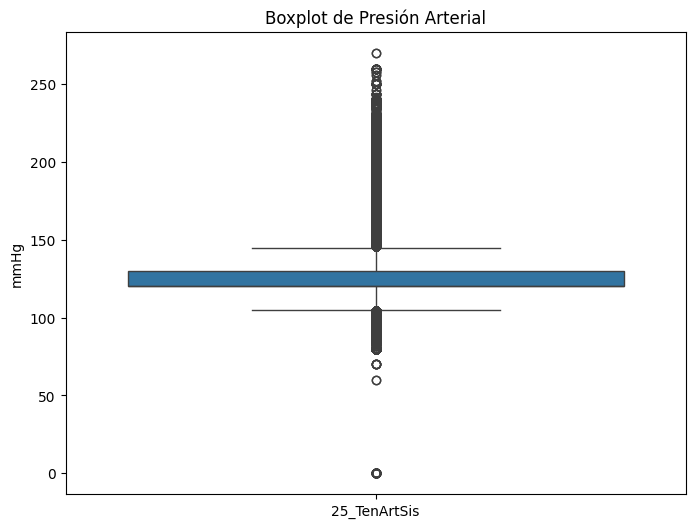

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['25_TenArtSis']])
plt.title('Boxplot de Presión Arterial Sistólica')
plt.ylabel('mmHg')
plt.show()


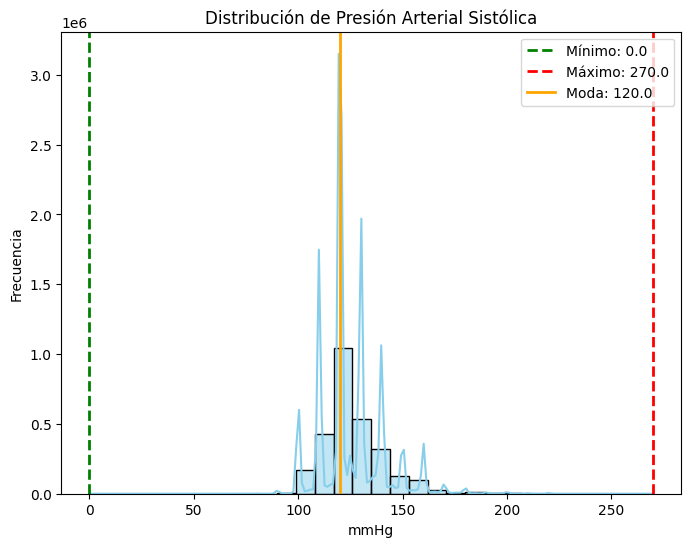

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

min_val = df['25_TenArtSis'].min()
max_val = df['25_TenArtSis'].max()
mode_val = stats.mode(df['25_TenArtSis'], keepdims=True)[0][0]  # moda

plt.figure(figsize=(8,6))
sns.histplot(df['25_TenArtSis'], bins=30, kde=True, color="skyblue")

plt.axvline(min_val, color='green', linestyle='--', linewidth=2, label=f'Mínimo: {min_val}')
plt.axvline(max_val, color='red', linestyle='--', linewidth=2, label=f'Máximo: {max_val}')
plt.axvline(mode_val, color='orange', linestyle='-', linewidth=2, label=f'Moda: {mode_val}')

plt.title('Distribución de Presión Arterial Sistólica')
plt.xlabel('mmHg')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Las imágenes presentadas ilustran la distribución de la presión arterial sistólica. Se observa un rango de datos que oscila entre 0 y 270 mmHg. Es evidente que los valores extremos de esta distribución son anómalos, probablemente derivados de errores en la recolección de datos, y requerirán un proceso de depuración. Además, se identifica una notable presencia de valores atípicos que también deberán ser tratados. No obstante, es importante destacar que la gran mayoría de las mediciones se agrupan en un intervalo normal. El valor de presión sistólica más común en la población estudiada es de 120 mmHg, un indicador de un estado de presión arterial estable aunque prenseta un pequeño sesgo hacia valores más grandes.

##### Presión arterial diastólica

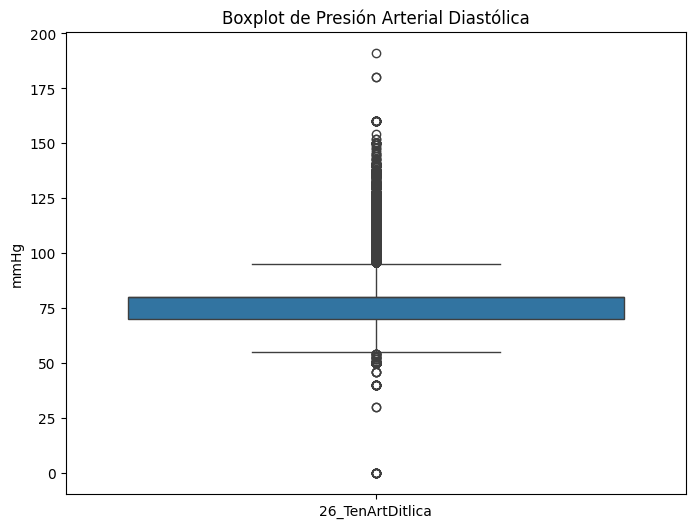

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['26_TenArtDitlica']])
plt.title('Boxplot de Presión Arterial Diastólica')
plt.ylabel('mmHg')
plt.show()

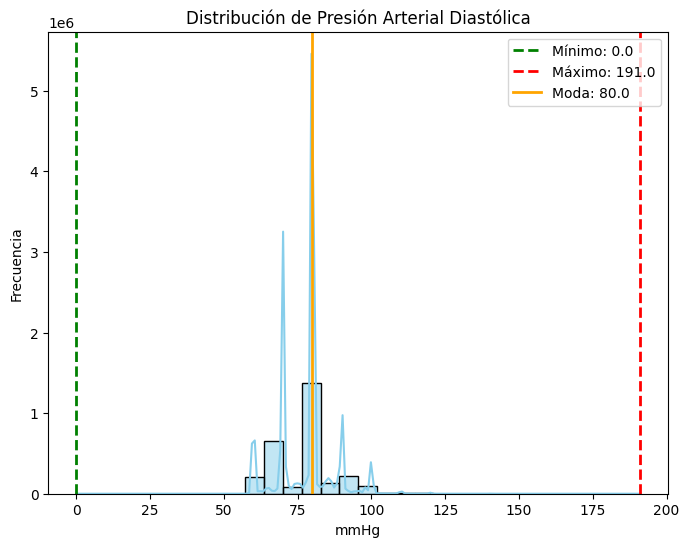

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

min_val = df['26_TenArtDitlica'].min()
max_val = df['26_TenArtDitlica'].max()
mode_val = stats.mode(df['26_TenArtDitlica'], keepdims=True)[0][0]  # moda

plt.figure(figsize=(8,6))
sns.histplot(df['26_TenArtDitlica'], bins=30, kde=True, color="skyblue")

plt.axvline(min_val, color='green', linestyle='--', linewidth=2, label=f'Mínimo: {min_val}')
plt.axvline(max_val, color='red', linestyle='--', linewidth=2, label=f'Máximo: {max_val}')
plt.axvline(mode_val, color='orange', linestyle='-', linewidth=2, label=f'Moda: {mode_val}')

plt.title('Distribución de Presión Arterial Diastólica')
plt.xlabel('mmHg')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


La distribución de la variable de presión diastólica exhibe una fuerte correspondencia con la de la presión sistólica. El rango de datos crudos (0-191 mmHg) evidencia la presencia de errores de registro en sus límites, así como una alta incidencia de valores atípicos que deberán ser gestionados en el preprocesamiento. La moda de la distribución se encuentra en 80 mmHg, lo cual representa un punto de referencia de normalidad clínica. Un aspecto distintivo de esta distribución es su asimetría, con un sesgo negativo o una inclinación hacia valores más bajos.

##### Índice de Masa Corporal (IMC)

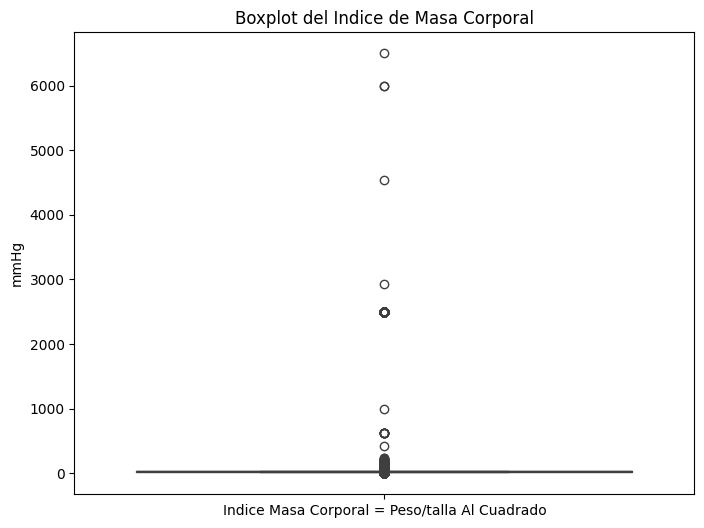

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Indice Masa Corporal = Peso/talla Al Cuadrado']])
plt.title('Boxplot del Indice de Masa Corporal')
plt.ylabel('mmHg')
plt.show()

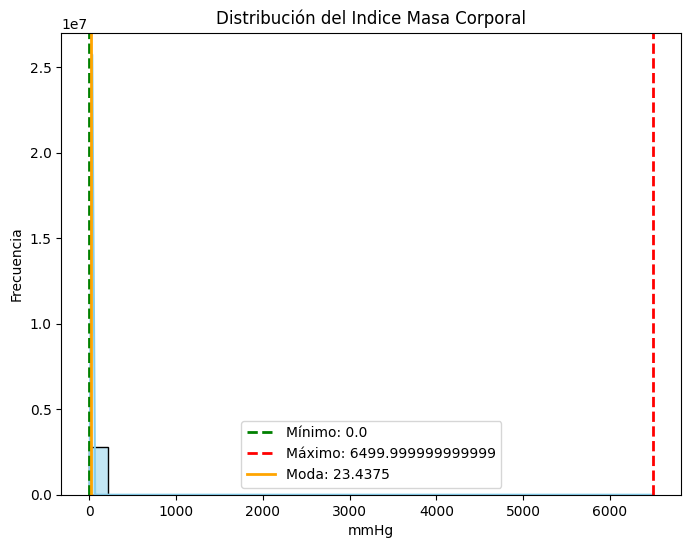

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

min_val = df['Indice Masa Corporal = Peso/talla Al Cuadrado'].min()
max_val = df['Indice Masa Corporal = Peso/talla Al Cuadrado'].max()
mode_val = stats.mode(df['Indice Masa Corporal = Peso/talla Al Cuadrado'], keepdims=True)[0][0]  # moda

plt.figure(figsize=(8,6))
sns.histplot(df['Indice Masa Corporal = Peso/talla Al Cuadrado'], bins=30, kde=True, color="skyblue")

plt.axvline(min_val, color='green', linestyle='--', linewidth=2, label=f'Mínimo: {min_val}')
plt.axvline(max_val, color='red', linestyle='--', linewidth=2, label=f'Máximo: {max_val}')
plt.axvline(mode_val, color='orange', linestyle='-', linewidth=2, label=f'Moda: {mode_val}')

plt.title('Distribución del Indice Masa Corporal')
plt.xlabel('mmHg')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Análisis Bivariado

### Preparación

En este caso identifico que hay muchas variables categóricas que estan almancenadas como int64 y float64, es significa que para cada uno de los valores estoy usando 8 bytes, sin embargo solo necesito representar unos y ceros, por lo que una opción es pasar las variables binarias a booleanos, que solo ocupan 1 byte por valor.

In [ ]:
bin_cols = [col for col in df.columns if set(df[col].unique()) <= {0, 1}]
df[bin_cols] = df[bin_cols].astype('bool')

In [ ]:
df.dtypes

,0
11_CodEtnia_Indigena,bool
11_CodEtnia_Negro,bool
11_CodEtnia_Otro,bool
11_CodEtnia_Palenquero de San Basilio,bool
11_CodEtnia_ROM (Gitano),bool
11_CodEtnia_Raizal,bool
ENDOSALUD_SI,bool
Indice Masa Corporal = Peso/talla Al Cuadrado,float64
24_Talla,float64
23_Peso,float64
